In [5]:
import numpy as np                                               # 고차원의 배열을 빠르게 연산하는 도구
import pandas as pd                                              # 행, 열로 구성된 표 데이터를 다르는 도구
import matplotlib.pyplot as plt                                  # 시각화 라이브러리
import seaborn as sns                                            # 시각화 라이브러리2

In [6]:
test = pd.read_csv("./data/competition/test.csv")
train = pd.read_csv("./data/competition/train.csv")

## train정보

In [7]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [9]:
train.describe()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,14653.000000,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,8459.769156,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7327.000000,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,14653.000000,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,21979.000000,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,29305.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
train[['workclass','education','marital-status','occupation','relationship','relationship','race','sex','native-country']].describe()

,workclass,education,marital-status,occupation,relationship,relationship,race,sex,native-country
count,29305,29305,29305,29305,29305,29305,29305,29305,29305
unique,9,16,7,15,6,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Husband,White,Male,United-States
freq,20410,9435,13331,3724,11769,11769,25081,19621,26301


In [11]:
train['sex'].unique()

array([' Male', ' Female'], dtype=object)

### 숫자데이터만 계산

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
knn_model=KNeighborsClassifier(n_neighbors=5)
tree_model=DecisionTreeClassifier(random_state=208)

In [14]:
feature_names = ['age', 'education-num','hours-per-week']
X = train[feature_names]
y = train['income']

In [15]:
X.shape, y.shape

((29305, 3), (29305,))

In [16]:
knn_model.fit(X, y)
tree_model.fit(X, y)  

DecisionTreeClassifier(random_state=208)

In [17]:
knn_pre = knn_model.predict(X)

In [18]:
knn_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
tree_pre = tree_model.predict(X)

In [20]:
tree_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## 인코딩

In [21]:
sex_dic = {" Male":0, " Female":1}
train['encoding_sex'] = train['sex'].map(sex_dic)

In [22]:
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Unmarried', ' Other-relative',
       ' Own-child', ' Wife'], dtype=object)

## 관련데이터 찾기

In [23]:
relationship_dic = {" Not-in-family":10, " Husband":11, ' Unmarried':12 , ' Other-relative':13 , ' Own-child':15,  ' Wife':15}
train['relationship_dic'] = train['relationship'].map(relationship_dic)
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,encoding_sex,relationship_dic
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0,0,10
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0,1,10
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,1,10
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0,1,10
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0,0,15
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0,0,15
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0,0,15
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0,0,10


In [24]:
train['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [25]:
race_dic = {' White':20, ' Asian-Pac-Islander':21, ' Black':22 , ' Amer-Indian-Eskimo':23, ' Other':24}
train['race_dic'] = train['race'].map(race_dic)
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,encoding_sex,relationship_dic,race_dic
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0,0,10,20
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0,1,10,20
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,1,10,21
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0,1,10,20
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1,0,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0,0,15,24
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0,0,15,22
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0,0,15,20
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0,0,10,20


In [26]:
train['occupation'].unique()

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', ' ?', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

In [27]:
occupation_dic = {" Machine-op-inspct":0 , " Other-service":1, ' Handlers-cleaners':2 , ' Tech-support':3 , ' Transport-moving':4,
           ' Farming-fishing': 5, ' Prof-specialty': 6, ' Priv-house-serv': 7, ' Adm-clerical': 8, ' Protective-serv':9, ' Exec-managerial':10,
            ' ?':11 , ' Craft-repair':12 , ' Sales':13 , ' Armed-Forces':14 }
train['occupation_dic'] = train['occupation'].map(occupation_dic)
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,encoding_sex,relationship_dic,race_dic,occupation_dic
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0,0,10,20,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0,1,10,20,1
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,1,10,21,2
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0,1,10,20,3
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1,0,11,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0,0,15,24,13
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0,0,15,22,13
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0,0,15,20,5
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0,0,10,20,12


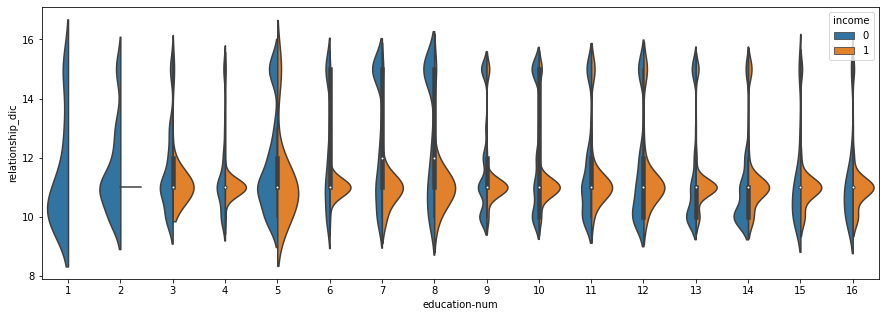

In [28]:
plt.figure(figsize=(15,5)) # 그림 size 조정
sns.violinplot(data = train,    # 사용할데이터
              x='education-num',          #x축에 사용할 컬럼
              y='relationship_dic',          #y축에 활용할 컬럼
              hue="income",   #KDE를 그릴때 구분할 컬럼(X축에서 2차적으로 가름)              
              split = True )     #hue를 붙여버림 )

- relationship_dic: husband일때 높다 -> 사용
- education-num: 3이상일때 높다

In [29]:
#,'sex_dic','race_dic','capital-gain','hours-per-week','relationship_dic','occupation_dic'

feature_names = ['age', 'education-num','hours-per-week','encoding_sex','race_dic','capital-gain','hours-per-week','relationship_dic','occupation_dic']
X = train[feature_names]
y = train['income']

## 하이퍼파라미터

In [30]:
train_score_list = [] # train 점수를 넣을 list

for k in range(1, 90):                          #최대: 데이터 개수*0.7(70%)
    model = KNeighborsClassifier(n_neighbors=k) # 이웃을 변경하는 모델생성
    model.fit(X, y)                 # 훈련데이터 학습

    #훈련데이터에 대한 점수 계산
    train_score = model.score(X, y)
    train_score_list.append(train_score) # 훈련데이터 점수를 리스트에 추가

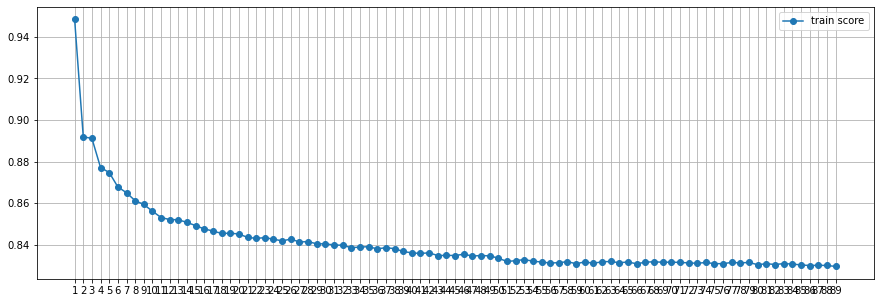

In [31]:
plt.figure(figsize = (15,5)) #그림그릴 도화지 (가로,세로)
#plt.plot(x,y)  #x:이웃의 숫자
            
plt.plot(range(1,90),         #x축 정보
         train_score_list,     #y축정보
         marker='o',          #마커
         label='train score',  #범례정보
            ) 

plt.xticks(range(1,90)) #x축 눈금조정
plt.legend() #범례를 보여워!
plt.grid()   #배경에 격자무늬
plt.show()   #그릴 그림을 보여줘   #이웃 보통 홀수개로 지정(짝수로 하면 5:5 생길수도)

## 학습

In [32]:
knn_model.fit(X, y)
tree_model.fit(X, y)  

DecisionTreeClassifier(random_state=208)

In [33]:
X_test = test[feature_names]  # test에 train인코딩 한 거 넣어야 한다

KeyError: "['relationship_dic', 'race_dic', 'occupation_dic', 'encoding_sex'] not in index"

In [ ]:
knn_pre = knn_model.predict(X_test)
knn_pre.shape

In [ ]:
tree_pre = tree_model.predict(X_test)

In [ ]:
submission = pd.read_csv('data/competition/sample_submission.csv')
submission

In [ ]:
submission['income'] = knn_pre     #(knn)모델의 예측결과로 대체
submission.to_csv('income_knn_pre.csv', index=False)  #csv 파일로 저장 #저장할때 index저장 안되게:index=False